<a href="https://colab.research.google.com/github/fxop0218/PyTorchForBeginners/blob/main/Classification_PyTorch_Beginners.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Network classification with PyTorch

**🟦EN**: Classification is a problem of prediction whether comething is one thing or another (there can be multiple things as the option)

**🟥ES**: La clasificación es un problema de predicción si comething es una cosa u otra (puede haber múltiples cosas como la opción)

## 1. Data

Make classification and get it ready

In [382]:
import sklearn
from sklearn.datasets import make_circles

n_samples = 1500

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=10)

In [383]:
len(X), len(y)

(1500, 1500)

In [384]:
print(f"Samples X:\n{X[:5]}\nSamples Y:\n{y[:5]}")

Samples X:
[[ 0.53587933 -0.82031212]
 [ 0.85831326  0.41626779]
 [-0.39942903 -0.65131878]
 [-0.02095879 -0.78382092]
 [-0.62363349  0.53683231]]
Samples Y:
[0 0 1 1 1]


In [385]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0],
                        "X2": X[:, 1],
                        "label": y})
circles.head(10)

,X1,X2,label
0,0.535879,-0.820312,0
1,0.858313,0.416268,0
2,-0.399429,-0.651319,1
3,-0.020959,-0.783821,1
4,-0.623633,0.536832,1
5,-0.628247,0.835893,0
6,-0.452196,-0.684702,1
7,0.282950,0.758301,1
8,0.708247,0.613602,0
9,-0.471695,-0.605710,1


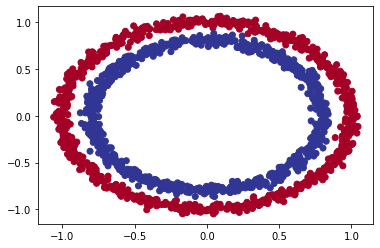

In [386]:
import matplotlib.pyplot as plt
plt.scatter(x=X[:, 0],
            y=X[:, 1],
            c=y,
            cmap=plt.cm.RdYlBu)


**🟦EN**: The challenge is to classify in which of the circles the dot is located, red or blue.

**🟥ES**: El reto consiste en clasificar en cual de los circulo se encuentra el punto, si en el rojo o en el azul.

In [387]:
print(f"X shape: {X.shape}, Y shape: {y.shape}")

X shape: (1500, 2), Y shape: (1500,)


#### View feature examples

In [388]:
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and theis label {y_sample}\nShapes for one sample of X: {X_sample.shape} and their label {y_sample.shape}")

Values for one sample of X: [ 0.53587933 -0.82031212] and theis label 0
Shapes for one sample of X: (2,) and their label ()


### Turn data into tensors and create train and test splits

In [389]:
# Data -> tensors
import torch

# Transform into tensor

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

print(f"X type: {type(X)} X DataType: {X.dtype}\nY type: {type(y)} Y DataType: {y.dtype} ")

X type: <class 'torch.Tensor'> X DataType: torch.float32
Y type: <class 'torch.Tensor'> Y DataType: torch.float32 


### Train / test split

In [390]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

print(f"X Train: {len(X_train)} // Test: {len(X_test)}")
print(f"y Train: {len(y_train)} // Test: {len(y_test)}")

X Train: 1200 // Test: 300
y Train: 1200 // Test: 300


## 2. Build a model

**🟦EN**: We want:
1. Setup device agonistic code so our code will run on an acceleratos (GPU // TPU) if there is one.
2. Construct a model (by subclassign `nn.Module`).
3. Define a loss function and optimizer.
4. Create a training and test loop.

**🟥ES**: Queremos:
1. Configurar código agonístico del dispositivo para que nuestro código se ejecute en un aceleratos (GPU // TPU) si lo hay.
2. Construir un modelo (subclasificando `nn.Module`).
3. 3. Definir una función de pérdida y un optimizador.
4. 4. Crear un bucle de entrenamiento y prueba.

In [391]:
# Import PyTorch
import torch
from torch import nn

# Agnostic
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device: {device}")

Device: cpu


**🟦EN**: Now we've setup device agnostic code, let's create a model that:

1. Subclasses `nn.Module`(almost all models in PyTorch subclass `nn.Module`)
2. Create 2 `nn.Linears()` layers that are capable of handling the shapes our data.
3. Define a `forward()` method that outlines the forward pass (or frward computation) of the model
4. Instatiate an instance of our model class and send it to the target `device`
**🟥ES**: Ahora que hemos configurado el código agnóstico de dispositivo, vamos a crear un modelo que:

1. Subclase `nn.Module`(casi todos los modelos en PyTorch subclase `nn.Module`)
2. 2. Cree 2 capas `nn.Linears()` que sean capaces de manejar las formas de nuestros datos.
3. 3. Definir un método `forward()` que esboce el paso hacia adelante (o cálculo hacia adelante) del modelo.
4. Instatiate una instancia de nuestra clase de modelo y enviarlo a la `device` de destino

In [392]:
IN_FEAT = len(X_train.shape)
OUT_FEAT = len(y_train.shape)

print(f"in_features: {IN_FEAT} \\ out_features: {OUT_FEAT}")

in_features: 2 \ out_features: 1


In [393]:

# Contruct model
class CircleClassV1(nn.Module):
  def __inti__(self): 
    super().__init__()
    # Create linear layers capable of handling the shapes of our data. 
    # self.layer_1 = nn.Linear(in_features=IN_FEAT, out_features=5) # Take in 2 features and upscales to 5 features
    # self.layer_2 = nn.Linear(in_features=5, out_features=OUT_FEAT) # Take in 5 features from previous layer and output a single feature

    self.two_linear_layers = nn.Sequential(
        nn.Linear(in_features=IN_FEAT, out_features=5),
        nn.Linear(in_features=5, out_features=OUT_FEAT)
    )

  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x => l1 => l2 => OP

  # Instantiate an instance of our model class and send it to the target device


In [394]:
model_circle = CircleClassV1().to(device)
model_circle

CircleClassV1()

In [395]:
model_circleV2 = nn.Sequential(
    nn.Linear(in_features=IN_FEAT, out_features=5),
    nn.Linear(in_features=5, out_features=OUT_FEAT)
).to(device)

model_circleV2

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [396]:
model_circle.state_dict()

OrderedDict()

In [397]:
untrained_predictions = model_circleV2(X_test.to(device))
print(f"Predictions length: {len(untrained_predictions)}, Shape: {untrained_predictions.shape}\nTest length {len(X_test)} Test Shape: {X_test.shape}")
print(f"5 firsts predictions: {untrained_predictions[:5]}\5 firsts labels: {y_test[:5]}")

Predictions length: 300, Shape: torch.Size([300, 1])
Test length 300 Test Shape: torch.Size([300, 2])
5 firsts predictions: tensor([[ 0.0255],
        [-0.0406],
        [ 0.0540],
        [-0.0075],
        [ 0.0313]], grad_fn=<SliceBackward0>) firsts labels: tensor([0., 1., 1., 0., 1.])


### 2.1 Setup loss function and optimizer

**🟦EN**: Which loss function or optimizer shoudl you use

In this problem, for exemple regression you might want MAE (Mean absolute error) or MSE (mean squared error).

As a reminder, the loss function measures how *wrong* your models prediction are

And for optimizers two of the most common and useful are SGD or Adam, howeber PyTorch has many built-in options.

* For the loss functiosn we're going to use `torch.nn.VECWithLogitsLoss()`, for more on what binary cross entropy (BCE).

* For a definition on what logit is in deep learning

* Different optimizers see `torch.optim`

**🟥ES**: ¿Qué función de pérdida u optimizador debería utilizar?

En este problema, por ejemplo de regresión, es posible que desee MAE (error absoluto medio) o MSE (error cuadrático medio).

Como recordatorio, la función de pérdida mide lo *equivocada* que es la predicción de tu modelo.

Y para los optimizadores dos de los más comunes y útiles son SGD o Adam, aunque PyTorch tiene muchas opciones incorporadas.

* Para la función de pérdida vamos a utilizar `torch.nn.VECWithLogitsLoss()`, para más información sobre lo que es la entropía cruzada binaria (BCE).

* Para una definición de lo que es logit en deep learning

* Diferentes optimizadores ver `torch.optim`.

In [398]:
loss_fn = nn.BCEWithLogitsLoss() # BCEWWithLogitsLoss => Sigmoid activation function built-in

optimizer = torch.optim.SGD(params=model_circleV2.parameters(),
                            lr = 0.05)

In [399]:
# Calcula accuracy - Out of 100 exemples, what percentage does our model get right?

def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3.Train the model

**🟦EN**:
1. Forward pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)

**🟥ES**:
1. Pase hacia delante
2. Calcular la pérdida
3. Optimizador cero grad
4. Pérdida hacia atrás (backpropagation)
5. Paso del optimizador (descenso de gradiente)


### 3.1 Going from raw logits => predictions probabilities => prediction labels.

**🟦EN**: The outputs of our model will be raw **logits**.

We can convert these **logits** into prediction probability by passing them to some kind of activation function (sigmoid, binay class, etc...).

Then we can convert the prediction probabilities of our model into **prediction labels** by rounding them or taking the `argmax()` value.

**🟥ES**: Las salidas de nuestro modelo van a ser **logits** en bruto

Podemos convertir estos **logits** en probabilidad de predicción pasándolos a algún tipo de función de activación (sigmoide, binay class, etc...)

Luego podemos convertir las probabilidades de predicción de nuestro modelo en **etiquetas de predicción** redondeándolas o tomando el valor `argmax()`.

In [400]:
# View the first 5 outputs of the forward pass on the test data
model_circleV2.eval()

with torch.inference_mode():
  y_log = model_circleV2(X_test.to(device))[:5]
  
y_log

tensor([[ 0.0255],
        [-0.0406],
        [ 0.0540],
        [-0.0075],
        [ 0.0313]])

**🟦EN**: We need these numbers to be 0 or 1

**🟥ES**: Necesitamos que estos numeros sean 0 o 1

In [401]:
# Use sigmoid activaton function in prediction probs

y_preds = torch.sigmoid(y_log)
y_preds

tensor([[0.5064],
        [0.4899],
        [0.5135],
        [0.4981],
        [0.5078]])

In [402]:
# if 0.5 < y_preds[x] == 1 // if 0.5 > y_preds[x] == 0
y_preds = torch.round(y_preds)
y_preds_label = torch.round(torch.sigmoid(model_circleV2(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_preds_label.squeeze()))

tensor([True, True, True, True, True])


### 3.1 Build training / testing loop 

In [403]:
 torch.manual_seed(10)
 torch.cuda.manual_seed(10)

 # Set the number of epochs
 epochs = 100

# Put training data to device

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  # Train
  model_circleV2.train()

  # Forward pass
  y_log = model_circleV2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_log)) # turn logits => preds probs => pred labels

  # 2. Calculate loss and accuracy

  loss = loss_fn(y_log, y_train) # Expects raw logits as imput.

  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward
  loss.backward()

  # 5. Optimizer step "gradient descent"
  optimizer.step()

  # Testing
  model_circle.eval()
  with torch.inference_mode():

    test_log = model_circleV2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_log))

    # Calculate test loss/accuracy
    test_loss = loss_fn(test_log, y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
    # Print info
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test loss: {test_loss:.2f} | Test accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69328 | Accuracy: 50.42% | Test loss: 0.69 | Test accuracy: 50.33%
Epoch: 10 | Loss: 0.69327 | Accuracy: 50.42% | Test loss: 0.69 | Test accuracy: 51.00%
Epoch: 20 | Loss: 0.69325 | Accuracy: 50.58% | Test loss: 0.69 | Test accuracy: 50.67%
Epoch: 30 | Loss: 0.69324 | Accuracy: 50.42% | Test loss: 0.69 | Test accuracy: 51.00%
Epoch: 40 | Loss: 0.69323 | Accuracy: 50.08% | Test loss: 0.69 | Test accuracy: 50.67%
Epoch: 50 | Loss: 0.69322 | Accuracy: 50.42% | Test loss: 0.69 | Test accuracy: 51.33%
Epoch: 60 | Loss: 0.69321 | Accuracy: 50.58% | Test loss: 0.69 | Test accuracy: 51.33%
Epoch: 70 | Loss: 0.69320 | Accuracy: 50.67% | Test loss: 0.69 | Test accuracy: 51.00%
Epoch: 80 | Loss: 0.69319 | Accuracy: 50.92% | Test loss: 0.69 | Test accuracy: 51.00%
Epoch: 90 | Loss: 0.69318 | Accuracy: 50.92% | Test loss: 0.69 | Test accuracy: 51.00%


4. Make predictions and evaluate the model

form the metrics it look like out model isn't 

In [404]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("Skipping helper_function.py download")
else: 
  print("Downloading helper_functions.py")
  req = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f: 
    f.write(req.content)

from helper_functions import plot_predictions, plot_decision_boundary

Skipping helper_function.py download


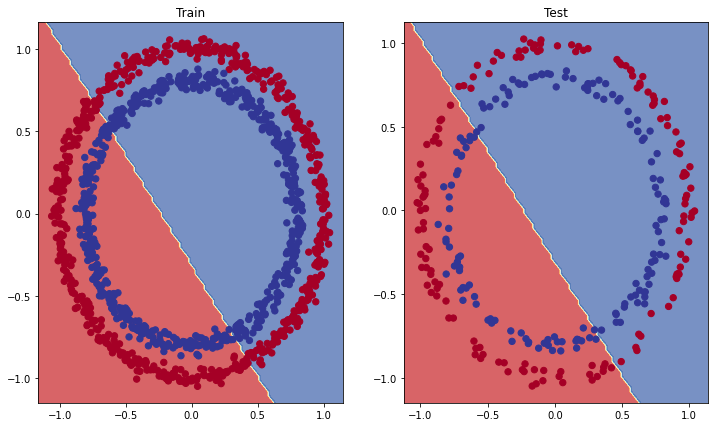

In [405]:
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_circleV2, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_circleV2, X_test, y_test)


# 5 Improbe the model
* Add more layers
* Add hidden units
* Fit longer 
* Change learning rate / loss function
* Change activation functions

In [406]:
model_circleV2.state_dict()

OrderedDict([('0.weight', tensor([[-0.0725, -0.0213],
                      [-0.2597,  0.1614],
                      [-0.4043, -0.1248],
                      [ 0.2710,  0.6644],
                      [ 0.1668, -0.2399]])),
             ('0.bias', tensor([ 0.0693, -0.0799,  0.2886,  0.0813,  0.2770])),
             ('1.weight',
              tensor([[ 0.4358, -0.1769, -0.0034,  0.0994, -0.0087]])),
             ('1.bias', tensor([-0.0395]))])

In [407]:
class CircleModelV3(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features = 10)
    self.layer_2 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_3 = nn.Linear(in_features = 10, out_features = 10)
    self.layer_4 = nn.Linear(in_features = 10, out_features = 1)

  def forward(self, x):
    return self.layer_4(self.layer_3(self.layer_2(self.layer_1(x))))

In [408]:
model_v3 = CircleModelV3().to(device)
model_v3

CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=10, bias=True)
  (layer_4): Linear(in_features=10, out_features=1, bias=True)
)

In [409]:
model_v3.state_dict()

OrderedDict([('layer_1.weight', tensor([[-0.0593, -0.0242],
                      [-0.2652,  0.1627],
                      [-0.4045, -0.1247],
                      [ 0.2741,  0.6637],
                      [ 0.1666, -0.2399],
                      [ 0.0678, -0.0792],
                      [ 0.2886,  0.0810],
                      [ 0.2770,  0.6858],
                      [-0.2936, -0.0250],
                      [ 0.1626, -0.0046]])),
             ('layer_1.bias',
              tensor([-0.0677, -0.6258, -0.6100, -0.6363, -0.6919, -0.6586, -0.5357, -0.6378,
                      -0.6633,  0.3100])),
             ('layer_2.weight',
              tensor([[ 0.1940,  0.2137,  0.1704,  0.1072,  0.1393, -0.1749,  0.2847, -0.0218,
                        0.2728,  0.0969],
                      [ 0.2475,  0.2523, -0.0661, -0.0920,  0.0476, -0.0134,  0.0495,  0.1604,
                       -0.2471, -0.0145],
                      [-0.2482,  0.3054, -0.2224,  0.0605, -0.0864,  0.1797,  0.0011, 

In [410]:
# Loss function

loss_fn = nn.BCEWithLogitsLoss()

# Optimizer
optimizer = torch.optim.SGD(params=model_v3.parameters(), lr=0.05)

In [411]:
torch.manual_seed(10)
torch.cuda.manual_seed(10)

# To better results, train from longer
epochs = 1500

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# train loop

for epoch in range(epochs):
  model_v3.train()

  # Forward pass
  y_log = model_v3(X_train).squeeze() # This returns probabilities
  # This transform probabilities into 0 or 1
  y_pred = torch.round(torch.sigmoid(y_log)) # turn logits => preds probs => pred labels

  # Loss
  loss = loss_fn(y_log, y_train)

  # Accuracy
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)
  
  # Optimizer zero grad
  # Optimizers are algorithms or methods used to minimize an error function(loss function)or to maximize the efficiency of production.
  optimizer.zero_grad()

  # Loss backward
  loss.backward()

  # Optimizer step "gradient descent"
  optimizer.step()

  # Testing
  # switch for some specific layers/parts of the model that behave differently during training and inference (evaluating) time. 
  model_circle.eval()
  with torch.inference_mode():

    test_log = model_circleV2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_log))

    # Calculate test loss/accuracy
    test_loss = loss_fn(test_log, y_test)

    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
    # Print info
    if epoch % 10 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f} | Accuracy: {acc:.2f}% | Test loss: {test_loss:.2f} | Test accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69423 | Accuracy: 50.25% | Test loss: 0.69 | Test accuracy: 51.00%
Epoch: 10 | Loss: 0.69356 | Accuracy: 50.25% | Test loss: 0.69 | Test accuracy: 51.00%
Epoch: 20 | Loss: 0.69327 | Accuracy: 56.25% | Test loss: 0.69 | Test accuracy: 51.00%
Epoch: 30 | Loss: 0.69314 | Accuracy: 55.08% | Test loss: 0.69 | Test accuracy: 51.00%
Epoch: 40 | Loss: 0.69309 | Accuracy: 53.58% | Test loss: 0.69 | Test accuracy: 51.00%
Epoch: 50 | Loss: 0.69306 | Accuracy: 53.00% | Test loss: 0.69 | Test accuracy: 51.00%
Epoch: 60 | Loss: 0.69305 | Accuracy: 52.67% | Test loss: 0.69 | Test accuracy: 51.00%
Epoch: 70 | Loss: 0.69305 | Accuracy: 52.00% | Test loss: 0.69 | Test accuracy: 51.00%
Epoch: 80 | Loss: 0.69304 | Accuracy: 51.83% | Test loss: 0.69 | Test accuracy: 51.00%
Epoch: 90 | Loss: 0.69304 | Accuracy: 52.08% | Test loss: 0.69 | Test accuracy: 51.00%
Epoch: 100 | Loss: 0.69304 | Accuracy: 52.08% | Test loss: 0.69 | Test accuracy: 51.00%
Epoch: 110 | Loss: 0.69304 | Accuracy: 51.9

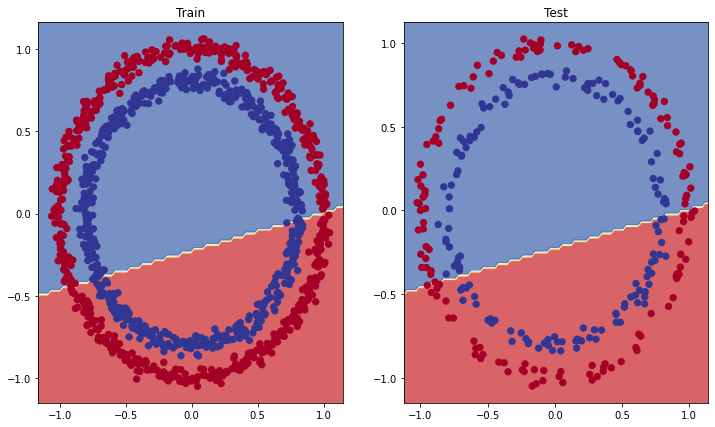

In [412]:
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_v3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_v3, X_test, y_test)


# Preparing data to see if out model can fit a strainght lien

**🟦EN**: One way to troubleshoot to a larger problem is to test out a smaller problem

**🟥ES**: Uno de los caminos para solucionar porblemas grandes, es mirar si ese problema es producido por uno mas pequeño.

In [413]:
# Create some data

weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

# Create data

X_regression = torch.arange(start, end, step).unsqueeze(dim=1)
y_regression = weight * X_regression + bias

# Check the data
print(len(X_regression))
X_regression[:10], y_regression[:10]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]), tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [414]:
# Train / test splits
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_regression, y_regression, train_size = 0.8)
print(f"X_train: {len(X_train_reg)} || y_train: {len(y_train_reg)}")
print(f"{X_train_reg[:10]}")

X_train: 80 || y_train: 80
tensor([[0.6900],
        [0.0800],
        [0.5300],
        [0.7100],
        [0.9900],
        [0.8300],
        [0.8600],
        [0.1800],
        [0.4000],
        [0.8000]])


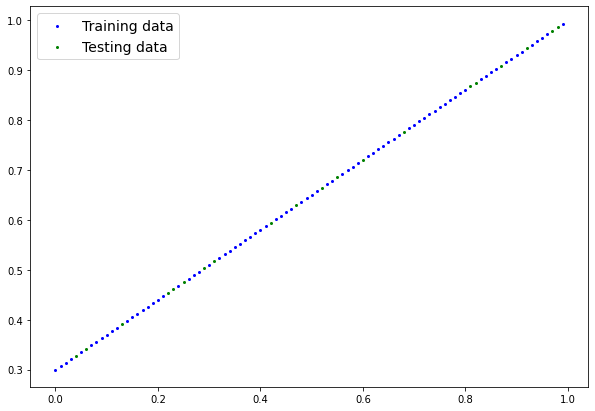

In [415]:
plot_predictions(train_data=X_train_reg,
                 train_labels=y_train_reg,
                 test_data=X_test_reg,
                 test_labels=y_test_reg )

### 5.2 Adjust model_v3 to fit a staight line

In [416]:
print(f"X_train_reg shape: {X_train_reg.shape}")

X_train_reg shape: torch.Size([80, 1])


**🟦EN**: As we can see, we only have one dimension per field, so we have to modify the first layer to accept only 1 input value and not two as it is currently. 

**🟥ES**: Como podemos ver, unicamente tenemos una dimension por campo, por lo que tenemos que modificar la primera capa aceptando unicamente 1 valor de entrada y no dos como esta actualmeten. 

In [417]:
# Same architecutre as model_1 (but using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=10, bias=True)
  (3): Linear(in_features=10, out_features=1, bias=True)
)

In [418]:
# Loss and optimizer
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model_2.parameters(), lr=0.1)

In [419]:
# Train the model
torch.manual_seed(10)
torch.cuda.manual_seed(10)

# Set the number of epochs
epochs = 1000

# Put th edata on the target device
X_train_reg, y_train_reg = X_train_reg.to(device), y_train_reg.to(device)
X_test_reg, y_test_reg = X_test_reg.to(device), y_test_reg.to(device)

# Training
for epoch in range(epochs):
  y_pred = model_2(X_train_reg)
  loss = loss_fn(y_pred, y_train_reg)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step() 
  model_2.eval()

  with torch.inference_mode():
    test_pred = model_2(X_test_reg)
    test_loss = loss_fn(test_pred, y_test_reg)

  if epoch % 50 == 0:
    print(f"Epoch: {epoch} | Test loss: {test_loss:.2f} | Test accuracy: {test_acc:.2f}%")


Epoch: 0 | Test loss: 0.70 | Test accuracy: 51.00%
Epoch: 50 | Test loss: 0.27 | Test accuracy: 51.00%
Epoch: 100 | Test loss: 0.15 | Test accuracy: 51.00%
Epoch: 150 | Test loss: 0.08 | Test accuracy: 51.00%
Epoch: 200 | Test loss: 0.07 | Test accuracy: 51.00%
Epoch: 250 | Test loss: 0.08 | Test accuracy: 51.00%
Epoch: 300 | Test loss: 0.06 | Test accuracy: 51.00%
Epoch: 350 | Test loss: 0.08 | Test accuracy: 51.00%
Epoch: 400 | Test loss: 0.08 | Test accuracy: 51.00%
Epoch: 450 | Test loss: 0.06 | Test accuracy: 51.00%
Epoch: 500 | Test loss: 0.06 | Test accuracy: 51.00%
Epoch: 550 | Test loss: 0.05 | Test accuracy: 51.00%
Epoch: 600 | Test loss: 0.05 | Test accuracy: 51.00%
Epoch: 650 | Test loss: 0.06 | Test accuracy: 51.00%
Epoch: 700 | Test loss: 0.08 | Test accuracy: 51.00%
Epoch: 750 | Test loss: 0.06 | Test accuracy: 51.00%
Epoch: 800 | Test loss: 0.05 | Test accuracy: 51.00%
Epoch: 850 | Test loss: 0.06 | Test accuracy: 51.00%
Epoch: 900 | Test loss: 0.08 | Test accuracy: 51.

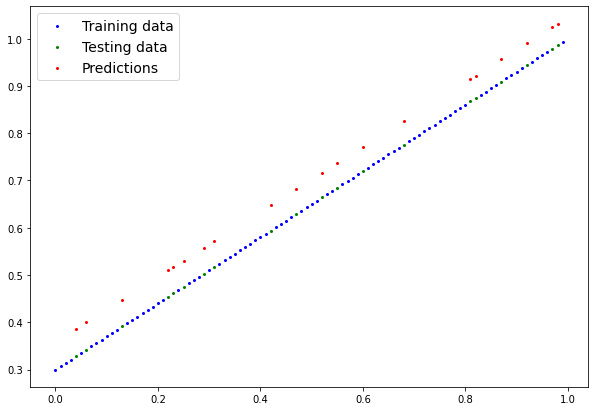

In [420]:
# Turn on evaluation mode
model_2.eval()

# Make predictions (inference)
with torch.inference_mode():
    y_preds = model_2(X_test_reg)

# Plot data and predictions with data on the CPU (matplotlib can't handle data on the GPU)
# (try removing .cpu() from one of the below and see what happens)
plot_predictions(train_data=X_train_reg.cpu(),
                 train_labels=y_train_reg.cpu(),
                 test_data=X_test_reg.cpu(),
                 test_labels=y_test_reg.cpu(),
                 predictions=y_preds.cpu());

# 6.Problem conclusions

**🟦EN**: With this result we can see that it does learn well, but only in a linear way, so the problem lies in the use of a linear activation.

**🟥ES**: Con este resultado podemos ver que si que aprende bien, pero unicamente de manera lineal, con lo que el problema radica en la utilización de una activación lineal


## 6.1 Recreating circles data

In [421]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_samp = 1500

X, y = make_circles(n_samp,
                    noise = 0.04,
                    random_state = 10)

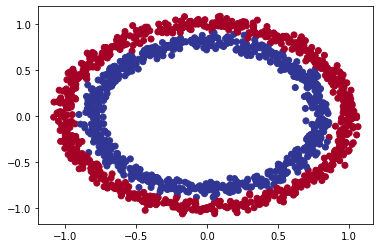

In [422]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

In [423]:
# Data => tensors

import torch
from sklearn.model_selection import train_test_split

# Data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8)

print(f"X_train length: {len(X_train)} | X_test length: {len(X_test)} | y_train length: {len(y_train)} | y_test length: {len(y_test)}")

X_train length: 1200 | X_test length: 300 | y_train length: 1200 | y_test length: 300


## 6.2 Build a non linear model

In [424]:
from torch import nn

class CircleNonLinModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features = 2, out_features=10)
    self.layer_2 = nn.Linear(in_features = 10, out_features=10)
    self.layer_3 = nn.Linear(in_features = 10, out_features=1)
    self.relu = nn.ReLU()
  
  def forward(self, x):
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

    
model_nl = CircleNonLinModel().to(device)
model_nl

CircleNonLinModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [425]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_nl.parameters(), lr = 0.1)

### 6.3 Train non linear model

In [426]:
# Random seeds
torch.manual_seed(10)
torch.cuda.manual_seed(10)

# Put data to device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

In [427]:
# Training loop
epochs = 2000

for epoch in range(epochs):

  # Forward pass
  y_log = model_nl(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_log)) # Logits => prediction probs =>

  # Calculate loss
  loss = loss_fn(y_log, y_train) # BCEWithLogits (takes in logits as first input)
  acc = accuracy_fn(y_true=y_train,y_pred=y_pred)

  # Optimizer zg
  optimizer.zero_grad()

  # Loss beckward
  loss.backward(retain_graph=True)

  # Step the optimizer
  optimizer.step()

  # --testing--

  model_nl.eval()
  with torch.inference_mode():
    test_log = model_nl(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_log))

    test_loss = loss_fn(test_log, y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)
    
  # pritn info
  if epoch % 100 == 0:
    print(f"Epoch:  {epoch} || Loss: {loss:.4f} || Acc: {acc:.2f}% || Test loss {test_loss:.4f}")

Epoch:  0 || Loss: 0.7067 || Acc: 49.58% || Test loss 0.6997
Epoch:  100 || Loss: 0.6927 || Acc: 65.75% || Test loss 0.6926
Epoch:  200 || Loss: 0.6922 || Acc: 50.50% || Test loss 0.6923
Epoch:  300 || Loss: 0.6918 || Acc: 56.08% || Test loss 0.6917
Epoch:  400 || Loss: 0.6912 || Acc: 58.50% || Test loss 0.6910
Epoch:  500 || Loss: 0.6905 || Acc: 56.92% || Test loss 0.6902
Epoch:  600 || Loss: 0.6896 || Acc: 54.42% || Test loss 0.6892
Epoch:  700 || Loss: 0.6884 || Acc: 53.83% || Test loss 0.6879
Epoch:  800 || Loss: 0.6869 || Acc: 53.42% || Test loss 0.6862
Epoch:  900 || Loss: 0.6850 || Acc: 53.25% || Test loss 0.6843
Epoch:  1000 || Loss: 0.6828 || Acc: 53.08% || Test loss 0.6819
Epoch:  1100 || Loss: 0.6803 || Acc: 55.17% || Test loss 0.6788
Epoch:  1200 || Loss: 0.6772 || Acc: 60.58% || Test loss 0.6748
Epoch:  1300 || Loss: 0.6736 || Acc: 60.58% || Test loss 0.6697
Epoch:  1400 || Loss: 0.6690 || Acc: 58.00% || Test loss 0.6628
Epoch:  1500 || Loss: 0.6628 || Acc: 57.25% || Test 

In [428]:
model_nl.eval()

with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_nl(X_test))).squeeze()

print(f"Y_preds; {y_preds[:10]}, y: {y[:10]}")

Y_preds; tensor([0., 0., 1., 1., 0., 1., 1., 0., 0., 1.]), y: tensor([0., 0., 1., 1., 1., 0., 1., 1., 0., 1.])


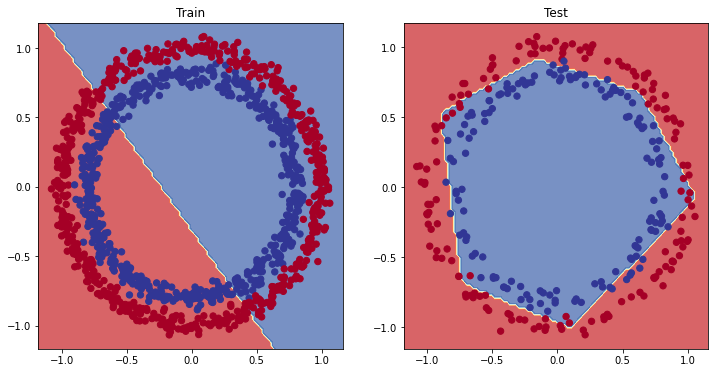

In [429]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Linear prediction")
plot_decision_boundary(model_circleV2, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("ReLU prediction")
plot_decision_boundary(model_nl, X_test, y_test) # model_3 = has non-linearity

## 7. Replicating non-linear functions

**🟦EN**: Neural networks, rather that us telling th emodel what to learn, we give it the tools to discover patterns in data and it tries to figure ou  patterns on its now

And these tools are linaer and non-linear functions

**🟥ES**: En las redes neuronales, en lugar de decirle al modelo lo que tiene que aprender, le damos las herramientas para descubrir patrones en los datos y él intenta descubrirlos por sí mismo.

Y estas herramientas son funciones lineales y no lineales.

In [436]:
# tensor

lin_test = torch.arange(-10, 10, 1, dtype=torch.float32)
print(f"data type: {lin_test.dtype} ||  Data: {lin_test}")

data type: torch.float32 ||  Data: tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])


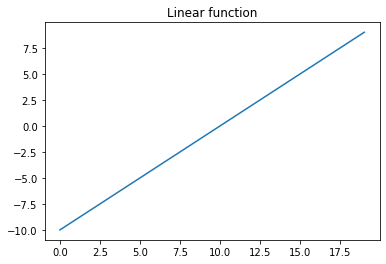

In [438]:
# Visualize the tensor
plt.title("Linear function")
plt.plot(lin_test)

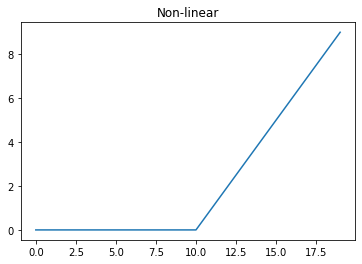

In [440]:
plt.title("ReLU activation")
plt.plot(torch.relu(lin_test))

In [442]:
print(f"Raw data: {lin_test} || after applying relu {torch.relu(lin_test)}")

Raw data: tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.]) || after applying relu tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])


**🟦EN**: How we can see, the relu activation function, transform all the negative values into 0

**🟥ES**: Como se puede ver, la función de activación relu, transforma todos los numeros negativos a 0



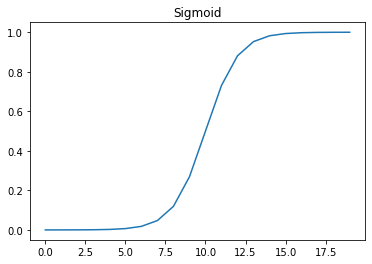

In [443]:
# With sigmoid

plt.title("Sigmoid")
plt.plot(torch.sigmoid(lin_test))

**🟦EN**: the values are between 0 and 1

**🟥ES**: Como se puede ver, la función de activación relu, transforma todos los numeros negativos a 0
